In [ ]:
import os
import pandas as pd
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/birdsong_metadata.csv')
df.head()

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/
3,82715,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
4,64685,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/


<ipython-input-3-0275c9c0b66d>:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y,sr=sr, x_axis='time', color='blue')


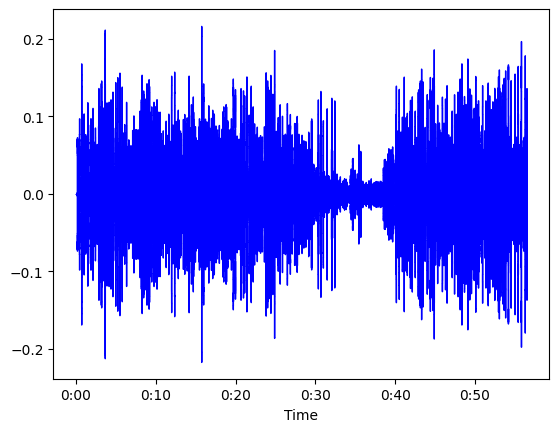

In [ ]:
#/content/sample_data/songs/xc101371.flac
sample_num = 11
filename = str('xc')+str(df.file_id[sample_num])+str('.flac')
y,sr=librosa.load('/content/drive/MyDrive/songs/'+str(filename))
librosa.display.waveshow(y,sr=sr, x_axis='time', color='blue')

In [ ]:
# Load and preprocess audio data
def load_and_preprocess_data(data, target_shape=(128, 128)):
    data = []
    labels = []

    for i in enumerate(df.file_id):
        filename = str('xc')+str(df.file_id[sample_num])+str('.flac')
        audio_data,sample_rate=librosa.load('/content/drive/MyDrive/songs/'+str(filename))
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
        data.append(mel_spectrogram)
        labels.append(i)

    return np.array(data), np.array(labels)

In [ ]:
# Split data into training and testing sets
data, labels = load_and_preprocess_data(df)
#labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print(labels)

[[     0 132608]
 [     1 132611]
 [     2  35068]
 [     3  82715]
 [     4  64685]
 [     5  64686]
 [     6 120664]
 [     7 120666]
 [     8  76767]
 [     9 124052]
 [    10 124053]
 [    11  27999]
 [    12 113082]
 [    13 101371]
 [    14 128853]
 [    15 123169]
 [    16 123170]
 [    17 158166]
 [    18 138979]
 [    19  30614]
 [    20 142431]
 [    21  83705]
 [    22  33395]
 [    23  99299]
 [    24 139552]
 [    25  67307]
 [    26  77645]
 [    27  94584]
 [    28  35578]
 [    29  95381]
 [    30  64738]
 [    31 118363]
 [    32  83894]
 [    33 156388]
 [    34  67229]
 [    35  27039]
 [    36 133880]
 [    37  97792]
 [    38 133886]
 [    39  70129]
 [    40 130409]
 [    41 146753]
 [    42  28961]
 [    43  99155]
 [    44 124013]
 [    45 129576]
 [    46 129577]
 [    47 143894]
 [    48 121691]
 [    49 156262]
 [    50 121735]
 [    51  92264]
 [    52 116226]
 [    53 121677]
 [    54  89994]
 [    55  82971]
 [    56  77429]
 [    57 130993]
 [    58  9461

In [ ]:
pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=9a03d9c25b52570cc620ba7e6957f4128fb561fa950065b3a99eb7c559d351a8
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound
